# Instagram Analysis
If a content creator wants to do well on Instagram in the long run, they have to look at the data of their Instagram reach. That is where we can apply Data Science in social media. This analysis take the data from an Data Science Instagram account, analyze how the account is doing in terms of reach and coversion, and finally predict the reach of Instagram posts with machine learning.


## Import Data and Packages

In [2]:
import os

# mount notebook to Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# set working directoty on google drive
root_dir = "/content/drive/My Drive/"
project_folder = "Data Analysis/Instagram Analysis"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)

Mounted at /content/drive

Your working directory was changed to /content/drive/My Drive/Data Analysis/Instagram Analysis

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [3]:
!pwd

/content/drive/My Drive/Data Analysis/Instagram Analysis


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_excel("Instagram.xlsx", sheet_name= "Instagram")
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

## Explore the Data

### Data cleaning - null values

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

#### The data has a null value in every column. Drop all the nulls.

In [6]:
data = data.dropna()

### Data Info

In [7]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here_x0092_s how you can write a Python progra...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,4082,2195,1248,541,36,135,11,5,175,19,6,Deep learning is a subset of machine learning ...,#deeplearning #machinelearning #artificialinte...
95,5394,2275,2975,45,65,61,19,6,147,69,6,You must have heard or invested in any cryptoc...,#data #datascience #dataanalysis #dataanalytic...
96,2766,2541,116,51,9,40,10,4,114,11,6,Here are all the programming languages that Fa...,#programming #coding #programmer #python #deve...
97,3924,2244,1278,326,34,139,11,3,151,19,2,Here are some of the most popular data science...,#data #datascience #dataanalysis #dataanalytic...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     99 non-null     int64 
 1   From Home       99 non-null     int64 
 2   From Hashtags   99 non-null     int64 
 3   From Explore    99 non-null     int64 
 4   From Other      99 non-null     int64 
 5   Saves           99 non-null     int64 
 6   Comments        99 non-null     int64 
 7   Shares          99 non-null     int64 
 8   Likes           99 non-null     int64 
 9   Profile Visits  99 non-null     int64 
 10  Follows         99 non-null     int64 
 11  Caption         99 non-null     object
 12  Hashtags        99 non-null     object
dtypes: int64(11), object(2)
memory usage: 10.2+ KB


In [9]:
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Impressions,99.0,4644.131313,2291.474570,1941.0,3225.0,3990.0,5172.5,16062.0
From Home,99.0,2267.808081,567.121422,1179.0,1960.0,2195.0,2577.5,4137.0
From Hashtags,99.0,1738.252525,1800.561054,116.0,655.0,1248.0,2222.0,11817.0
From Explore,99.0,417.040404,511.751971,0.0,124.5,249.0,496.0,2355.0
From Other,99.0,137.242424,184.376118,9.0,36.0,69.0,157.5,1115.0
Saves,99.0,126.909091,107.821100,22.0,61.0,104.0,144.0,668.0
Comments,99.0,6.959596,3.610979,0.0,5.0,7.0,9.0,19.0
Shares,99.0,8.000000,7.398290,0.0,3.0,6.0,11.5,41.0
Likes,99.0,160.333333,64.883884,72.0,116.5,150.0,188.5,416.0
Profile Visits,99.0,38.424242,58.915555,4.0,14.0,21.0,36.5,347.0


## Analyzing Instagram Reach

###  * Distribution of impressions received from home

<ipython-input-10-56b9aea354db>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


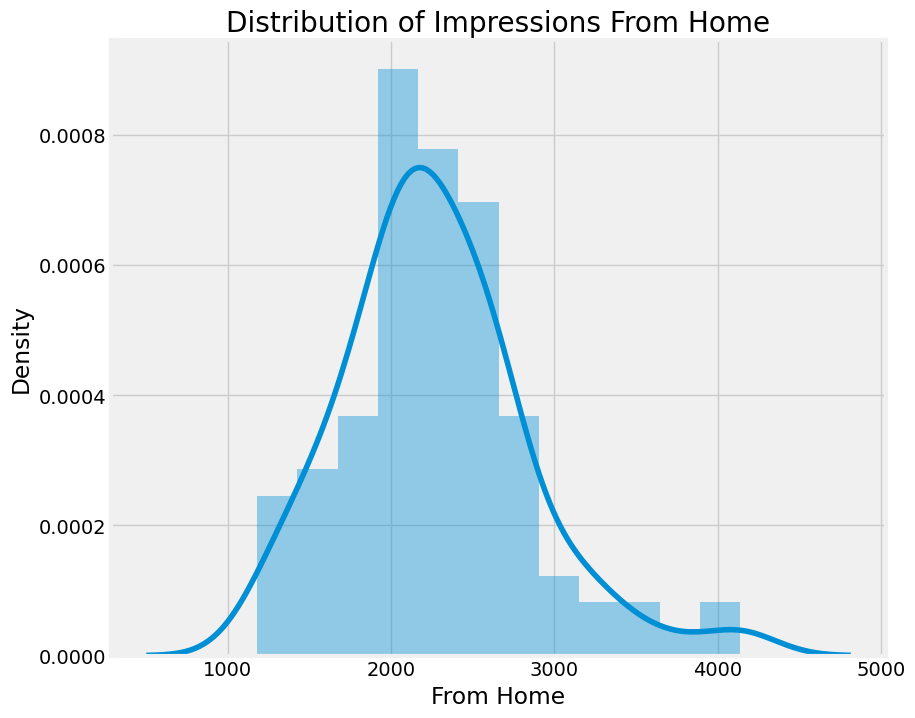

In [10]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

#### The impressions from the home section on Instagram shows how much the posts reach the followers. Looking at the impressions from home, we can say it’s hard to reach all followers daily. 

### * Distribution of the impressions received from hashtags:

<ipython-input-11-8c45b7b41edc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


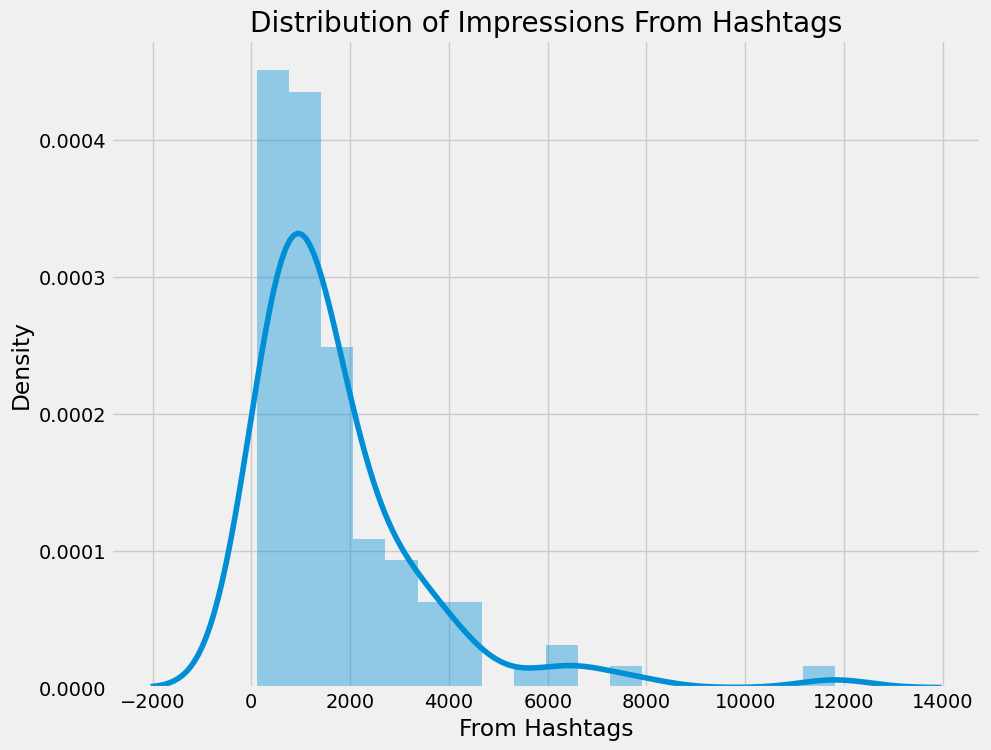

In [11]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

#### Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. 

### * Distribution of impressions received from the explore section of Instagram

<ipython-input-12-3461ec84008d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


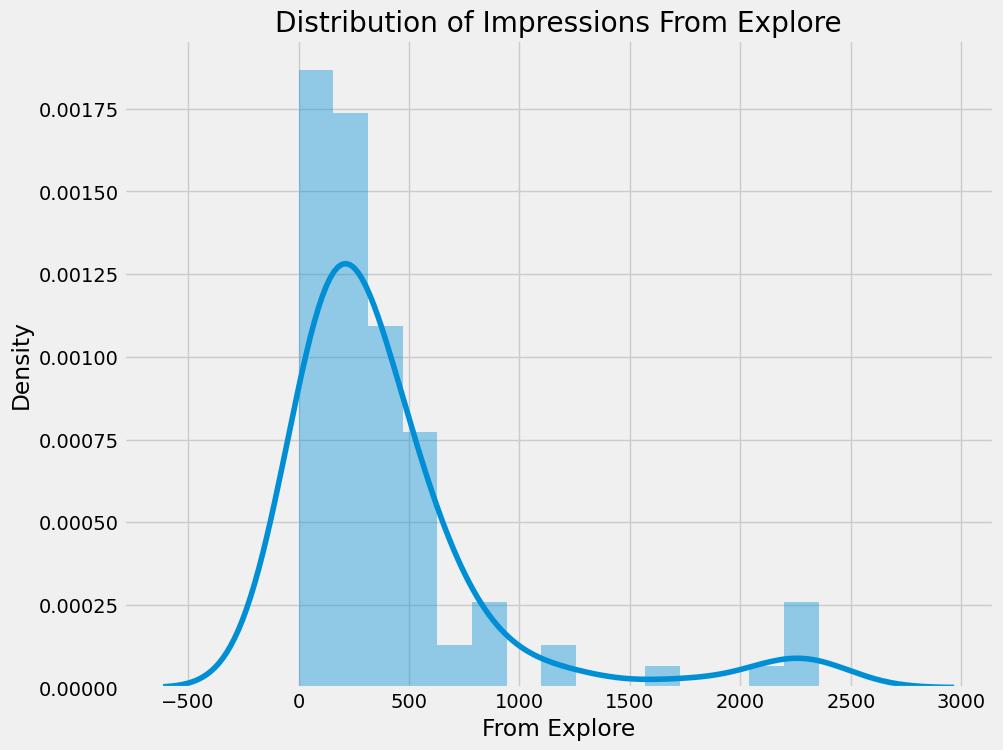

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

#### The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. The plot shows Instagram does not recommend the posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach received from hashtags.


### * Percentage of impressions from various sources on Instagram

In [13]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

#### The donut plot shows that almost half of the reach is from the followers, 38% is from hashtags, 9% is from the explore section, and 3% per cent is from other sources. 
#### It might be a good idea to try to keep producing high quality content targeting the existing followers, while adding more targeted/popular hashtags in each posts to boost the reach.


## Analyzing Instagram Content

### * What are the most used words in the caption of the Instagram posts?


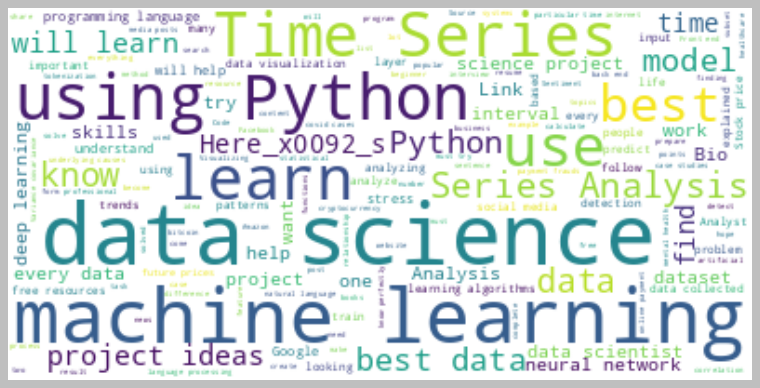

In [14]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### * What are the most used words in the comments of the Instagram posts?


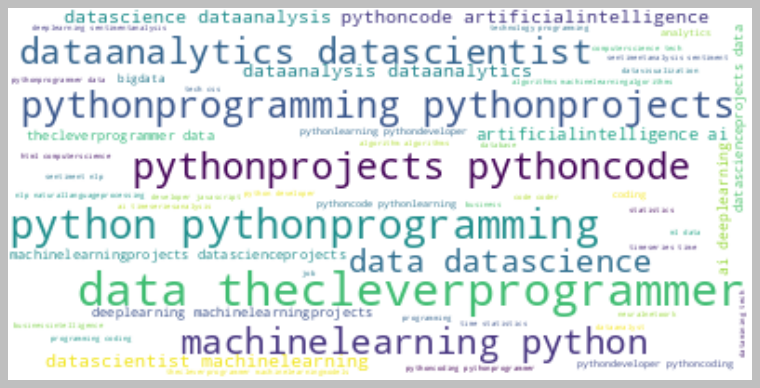

In [15]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing Relationships

### What are the dominant factors in Instragram reach?

### * Relationship between the number of likes and the number of impressions on the Instagram posts

In [16]:
figure1 = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure1.show()

#### There is a linear relationship: the larger impressions is associated with more likes.

### * Relationship between the number of comments and the number of impressions on the Instagram posts

In [17]:
figure2 = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure2.show()

#### It looks like a linear relationship doesn't exist. The number of comments on a post doesn’t affect its reach.

### *Relationship between the number of shares and the number of impressions

In [18]:
figure3 = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure3.show()

#### It looks like a larger share number will result in a higher reach, but shares don’t affect the reach of a post as much as likes do

### * Relationship between the number of saves and the number of impressions

In [19]:
figure4 = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure4.show()

#### There is a linear relationship.

### *Relationship between the total profile visits and the number of followers gained from all profile visits

In [20]:
figure5 = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure5.show()

### * Correlation of all the columns with the Impressions column

In [21]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


<ipython-input-21-e57b1c4dec3a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Findings: Larger number of visits will help to gain more followers. More likes and saves will help to get more reach on Instagram. The higher number of shares will also help to get more reach, but a low number of shares will not affect reach either.

## Analyzing Conversion Rate

### In Instagram, conversion rate means how many followers the account is getting from the number of profile visits from a post. The formula used to calculate conversion rate is (Follows/Profile Visits) * 100

In [22]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


#### The conversion rate of this account is 31%, which is good.

## Instagram Reach Prediction

### Train a machine learning model to predict the reach of an Instagram post

In [23]:
# split the data into training and test sets 
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [24]:
# train a model
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8188661087124051

In [25]:
# predict the reach of an Instragram post
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([7950.8694037])